In [2]:
# theory - same as clg course
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,2].values

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

In [9]:
Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]


[[65  3]
 [ 7 25]]


Text(33.22222222222222, 0.5, 'truth')

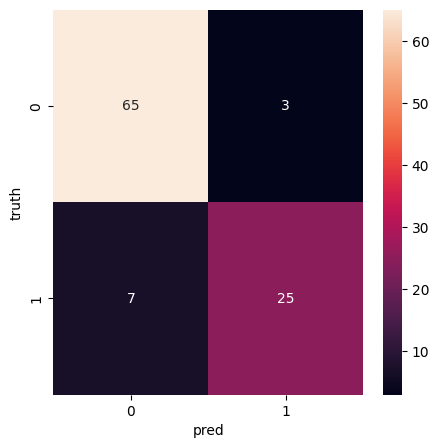

In [10]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)


import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel('pred')
plt.ylabel('truth')

In [11]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


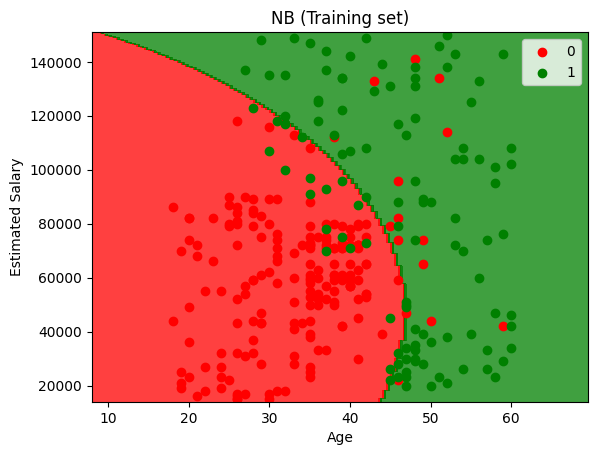

In [12]:
# visualizing training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.50),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.50))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NB (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


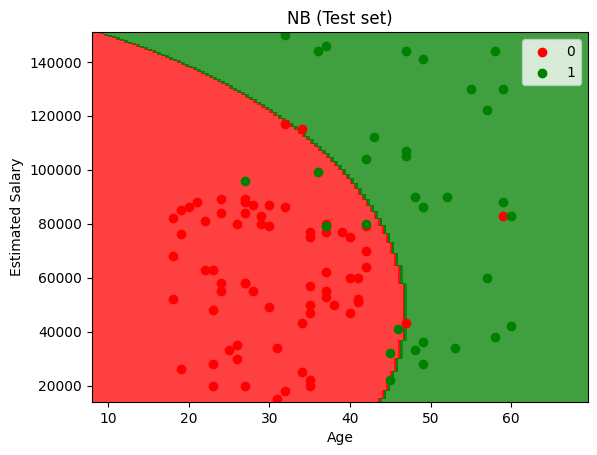

In [13]:
# on training set
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NB (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()